##Bosques Aleatorios: 
Bosque de decisión, está compuesto por dos o más árboles de decision. Siempre se parte de árboles de decisión que luego conformarán un bosque.

¿Ingreso Alto o Bajo?

Horas trabajadas, Años de Estudio, Edad, Tipo trabajo, ...

#Árbol 1

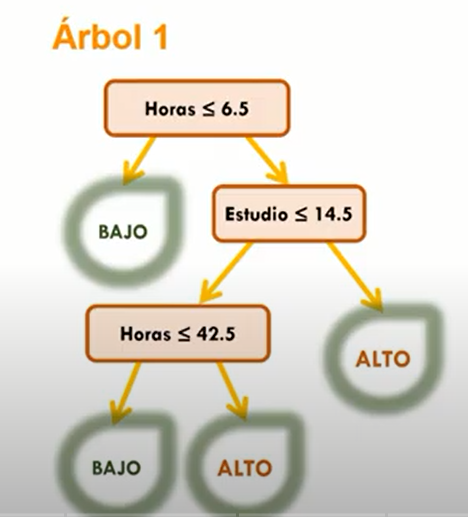

##Árbol 2

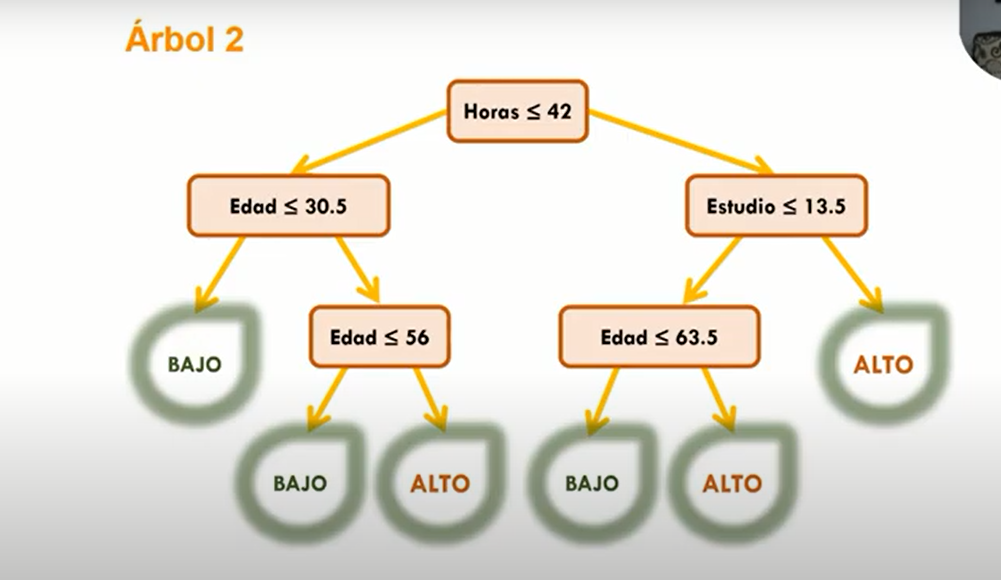




##Árbol 3

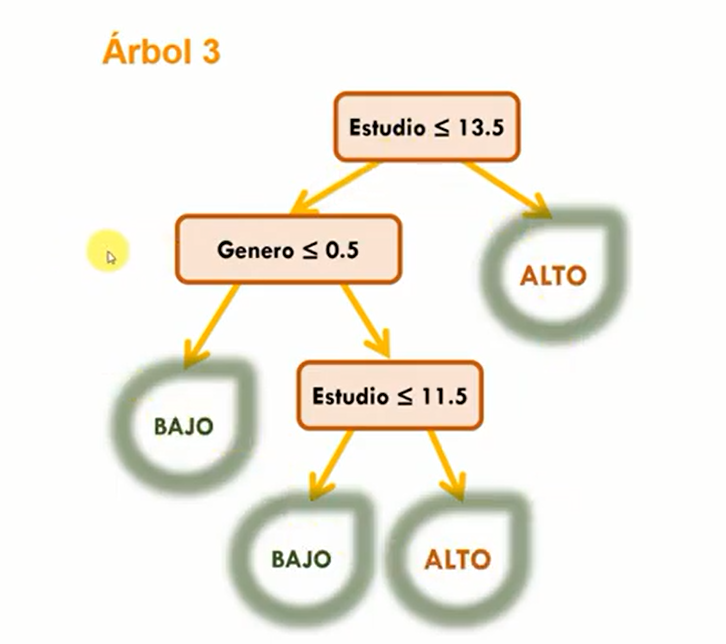

##Bosque Aleatorio 

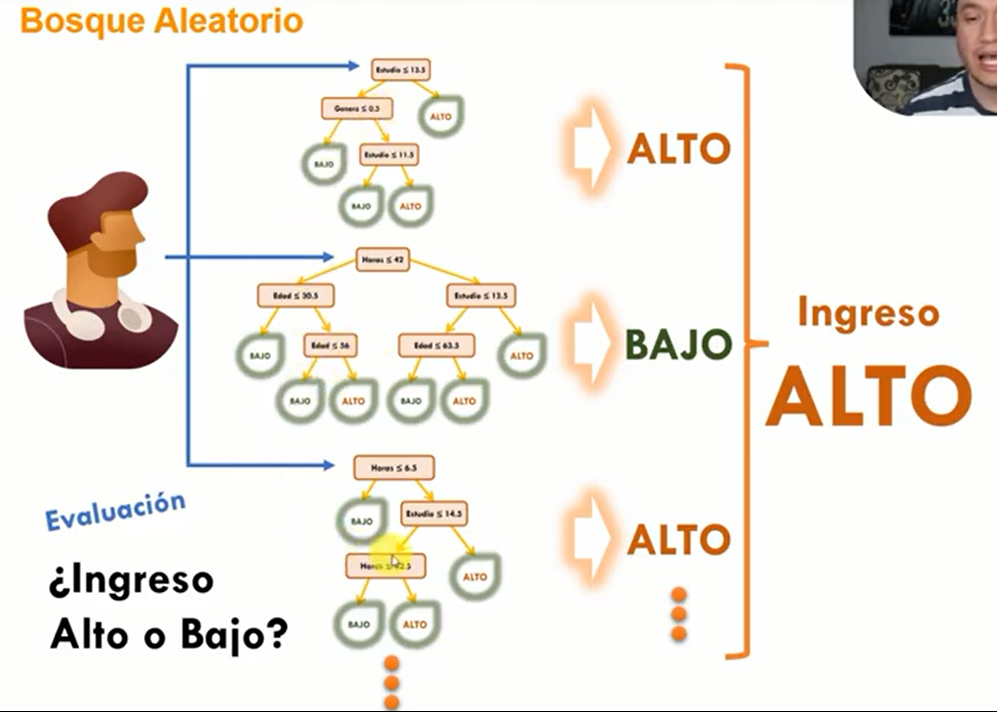

Nuestro bosque evalua cada uno de los 3 árboles construidos y cada uno nos devuelve un resultado, pero puede que estos resultados no sean iguales entonces hay que evaluar cual elegir. Para el ejemplo, por mayoría nos quedamos con ingresos altos.

Los bosques aleatorios resuelven un problema que tienen los arboles, es que presentan una alta variabilidad, dependen mucho de los datos que usamos para crearlos. En bosques, al evaluar más de un arbol, esa variabilidad disminuye. El resultado de la decisión por bosque, siempre voy a tener más de una opcion y luego debo tomar una decisión pero con información amplia.

Nuestros bosques buscan que los arboles sean variados. Una variación es que cada arbol se entrene de manera diferente, con diferentes instancias y además, en cada árbol puede tomar ciertas caracterísiticas que otros arboles no, de está manera se toman multiples clasificadores, variantes para así tener una perspectiva global.

##Aleatoriedad:

Muestreo con reemplazo


In [2]:
import pandas as pd 

personas = pd.read_csv("https://raw.githubusercontent.com/CodigoMaquina/code/main/datos/ingresos.csv")

#La columna tipo de trabajo es 0 si es publico y 1 si es privado.
#Ingreso bajo = 0 e ingreso alto = 1

#muestro con remplazo. La decisión de seleccionar 2/3 es el criterio de selección de la cantidad de datos que quiero utilizar.
#al generar varios muestros aleatorios, estoy generando varios arboles con diferentes valores.

print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))

    edad  estudio  genero  tipo_trabajo  horas  ingreso
27    21       10       1             0     25        0
69    40        9       0             0     40        0
61    43       10       0             0     35        0
18    17        8       1             0     15        0
24    35       13       1             1     60        0
..   ...      ...     ...           ...    ...      ...
88    24        3       1             0     60        0
22    59        9       1             1     40        0
10    49        3       0             0     20        0
75    50        9       1             1     40        0
37    31       10       1             0     40        0

[67 rows x 6 columns]
    edad  estudio  genero  tipo_trabajo  horas  ingreso
89    53        9       1             1     40        1
85    46       10       0             1     50        0
87    32       13       1             0     45        0
32    76        4       0             0     12        0
77    19        5       1

##Aleatoriedad:

Selección de las Características para Divisiones

In [8]:
from random import sample #permite hacer un muestro aleatorio

print(personas.columns[:-1], "\n") #quito la columna 'ingreso' dado que es la variable objetivo
print(sample(set(personas.columns[:-1]), 3)) 
print(sample(set(personas.columns[:-1]), 3)) 

#la mejor caracteristica clasificadora se obtiene mediante el calculo de impureza de GINI.

#la función 'sample' requiere un conjunto por eso necesario indicar la función 'set' delante
#le indico todas las columnas que tengo y le indico un valor, lo que va a hacer es aleatoriamente seleccionar 3 columnas para ir generando árboles
#la ventaja es que al ser aleatorio, siempre voy a tener arboles distintos
#si seleccionamos todas las columnas, siempre la clasificación va a ser igual dado que va a construir el arbol siguiendo el calculo de GINI
#para calcular cuantas columnas aleatorias hay que seleccionar, por convención, hay que hacer raíz cuadrada del total de columnas y el resultado es el n°

Index(['edad', 'estudio', 'genero', 'tipo_trabajo', 'horas'], dtype='object') 

['edad', 'estudio', 'tipo_trabajo']
['horas', 'tipo_trabajo', 'estudio']


##Creación de Bosque Aleatorio (Random Forest)

In [4]:
from sklearn.ensemble import RandomForestClassifier 

bosque = RandomForestClassifier(n_estimators=100, #cuantos arboles voy a tomar en cuenta, normalmente se indica de 100 para arriba
                               criterion="gini", #criterio de creación del árbol, entropía o gini
                               max_features="sqrt", #cuantas caracteristicas se van a tomar para la división de ramas, criterio de raíz cuadrada. sqrt=raiz cuadrada
                               bootstrap=True, #muestro aleatorio
                               max_samples=2/3, #indico la cantidad de datos a seleccionar por cada muestro
                               oob_score=True) #metrica especial para bosques. 

bosque.fit(personas[personas.columns[:-1]].values, personas["ingreso"].values) #le indico datos al bosque

#primero indico cuales son las caracteristicas para crear el arbol 
#luego indico df original, dado que es un modelo de clasificación supervisado, por eso le indico la clase
#es necesario indicar la función value para transformar el df en array.

print(bosque.predict([[50, 16, 1, 1, 40]])) #ejecutamos una predicción. Indicamos diferentes valores para las columnas, edad, años de estudio, tipo de trabajo
print(bosque.score(personas[personas.columns[:-1]].values, personas["ingreso"].values)) #visualizacion accuracy
print(bosque.oob_score_) #score de la evaluación de las instancias fuera de la selección aleatoria

#la predicción nos indica que tiene un alto ingreso
#el accuracy es alto dado que lo estamos evaluamos con los mismos datos que los entrenamos
#el score de los datos no seleccionados baja

[1]
0.97
0.75


##Visualización del Bosque Aleatorio

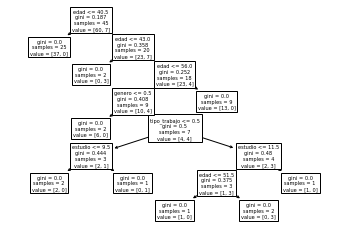

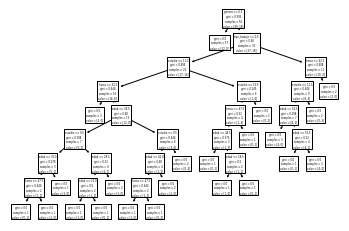

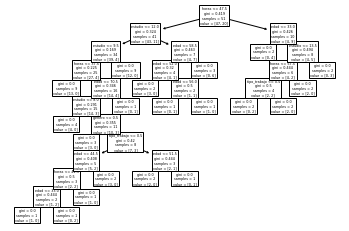

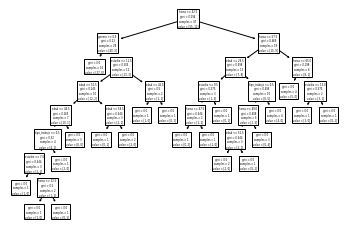

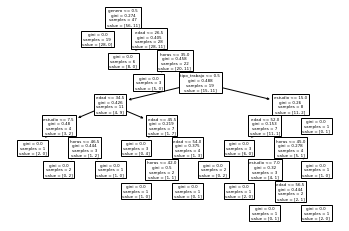

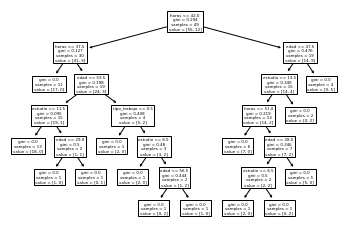

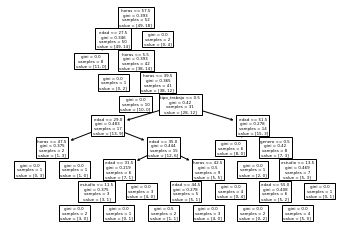

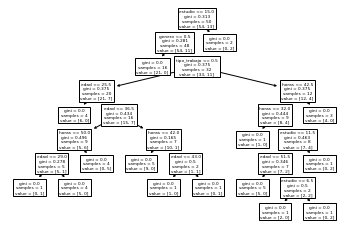

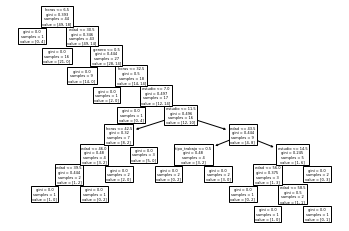

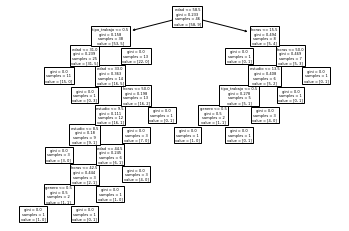

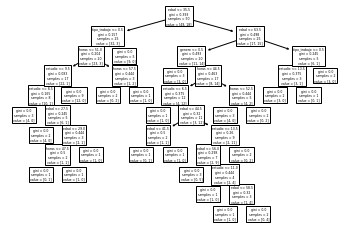

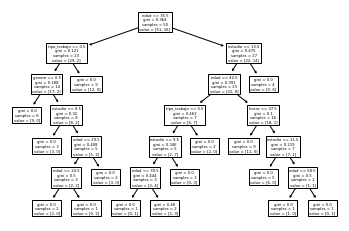

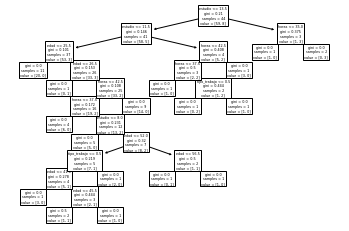

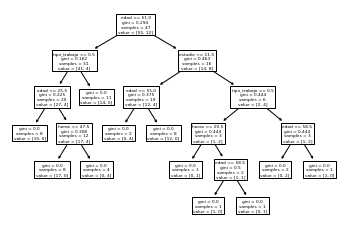

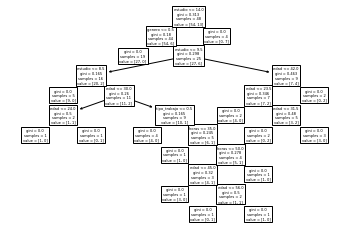

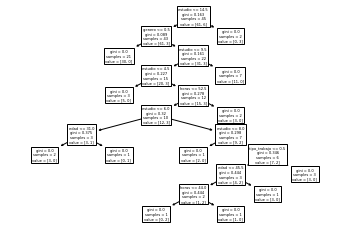

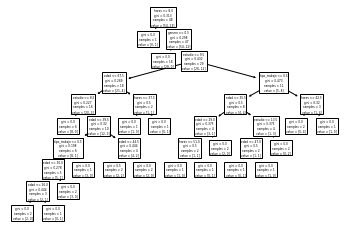

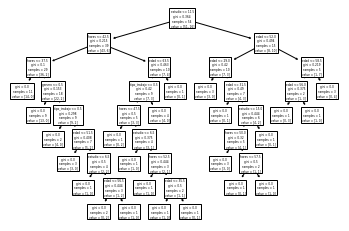

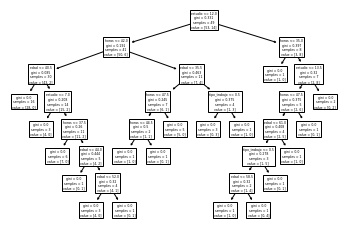

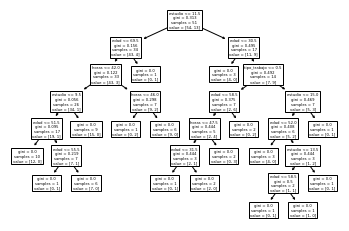

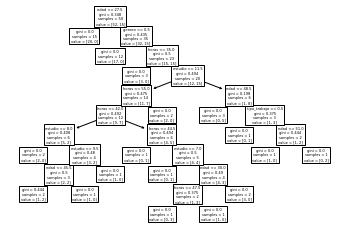

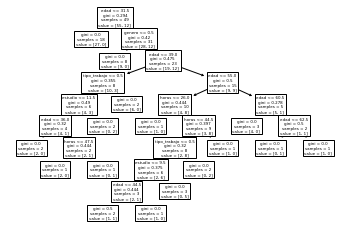

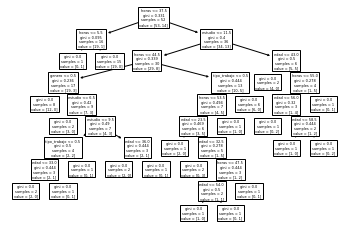

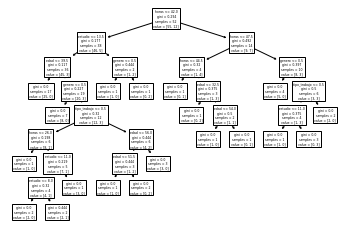

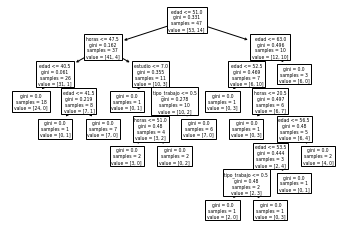

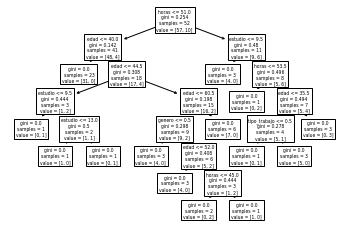

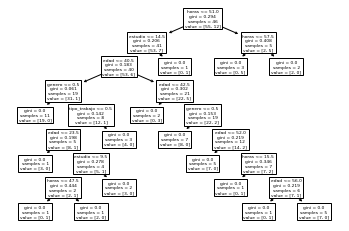

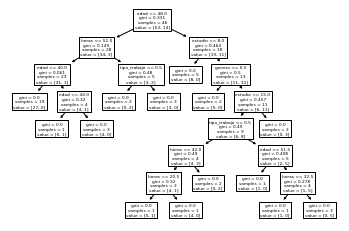

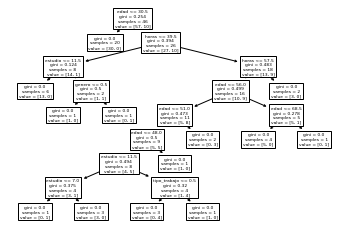

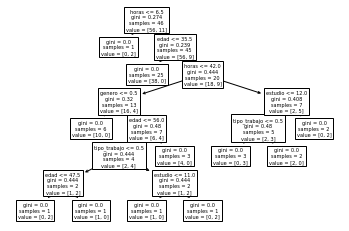

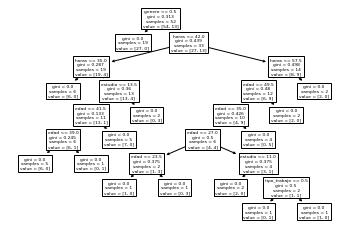

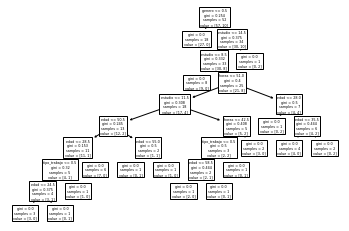

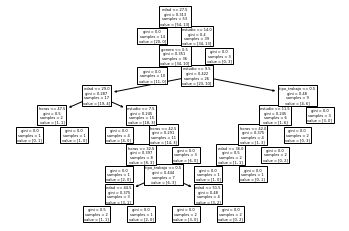

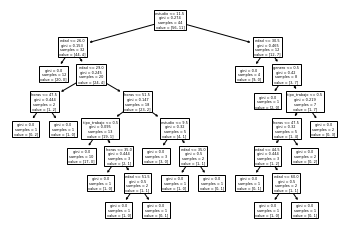

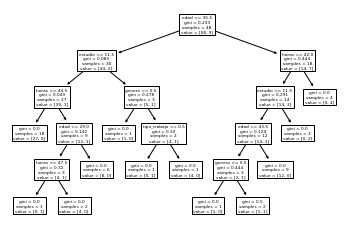

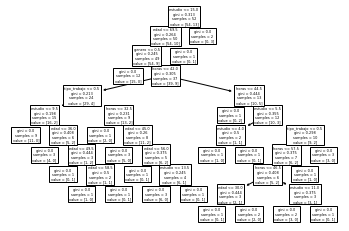

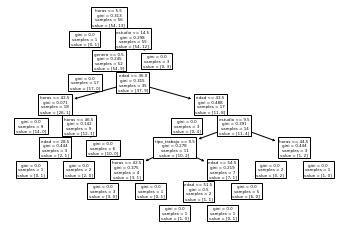

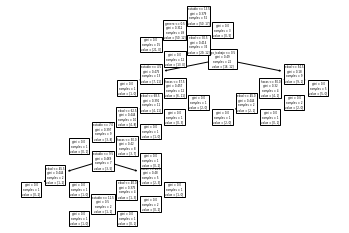

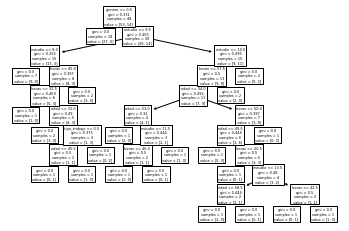

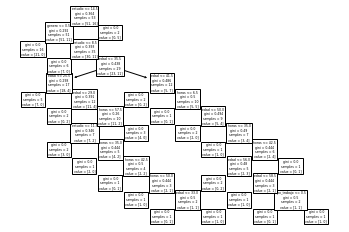

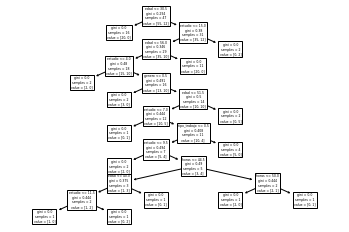

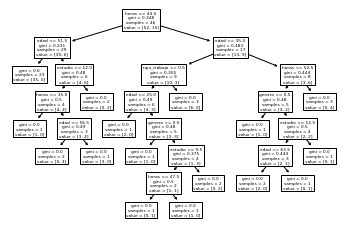

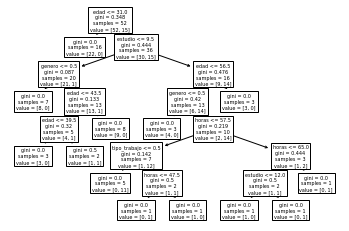

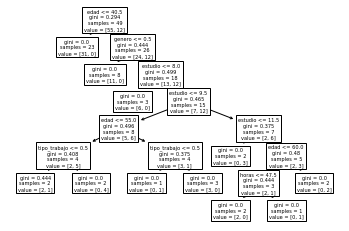

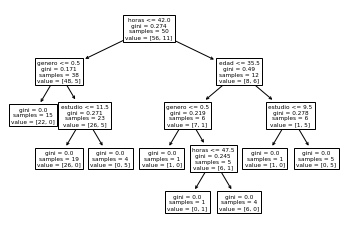

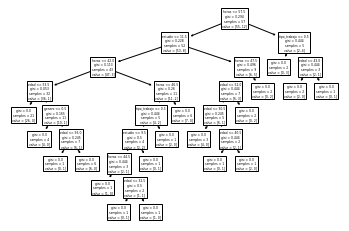

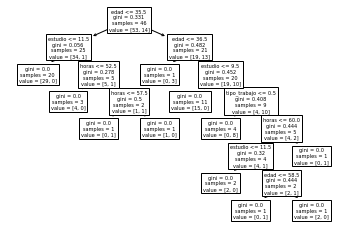

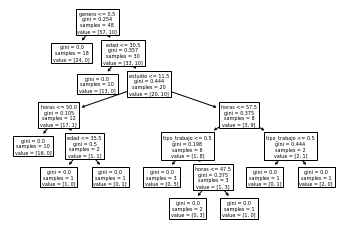

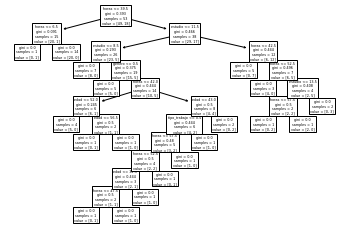

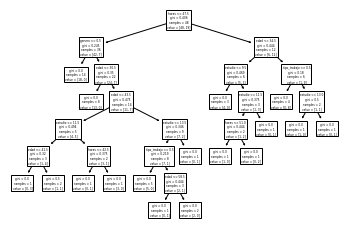

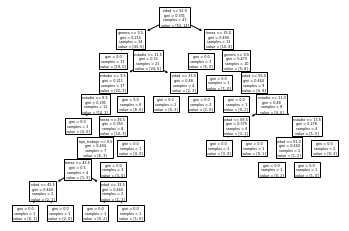

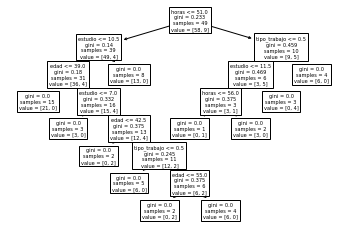

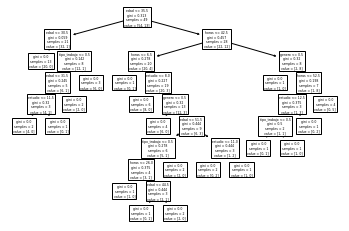

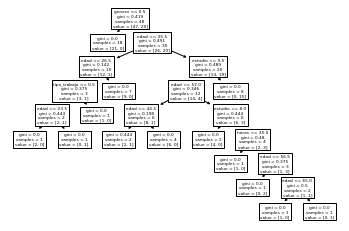

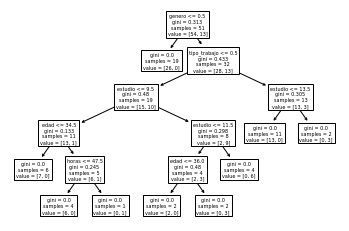

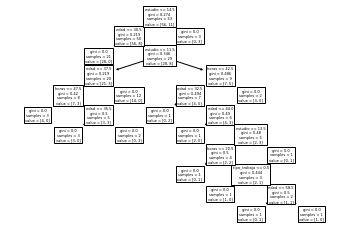

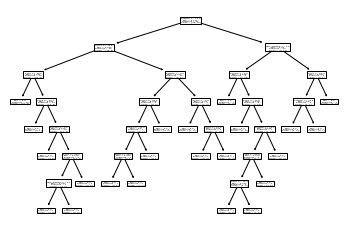

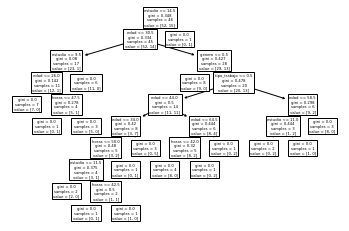

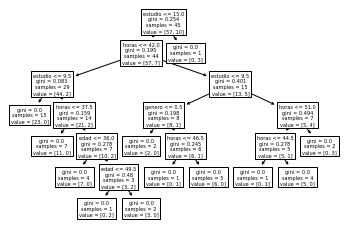

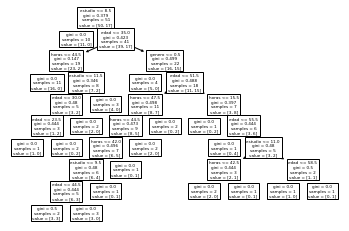

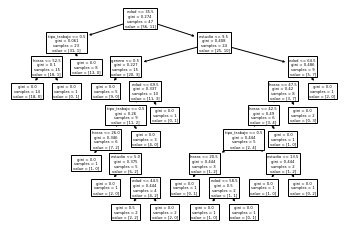

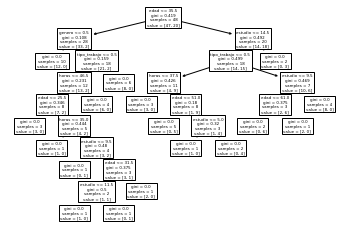

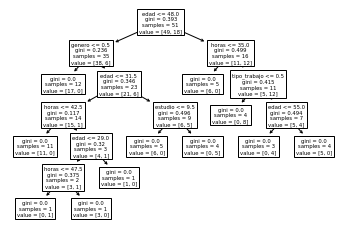

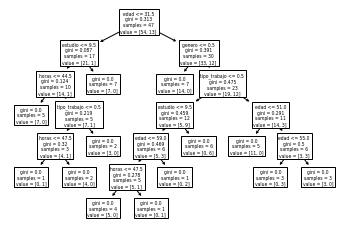

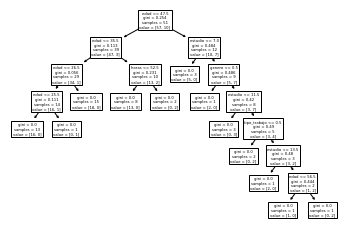

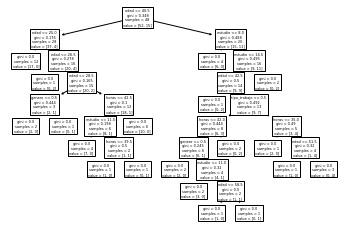

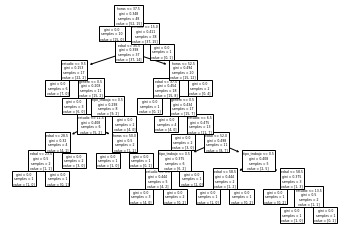

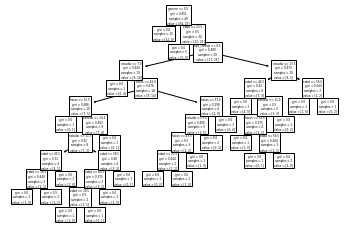

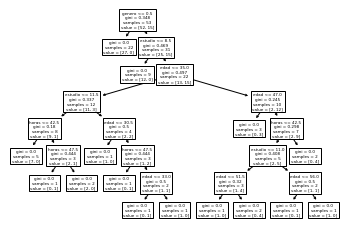

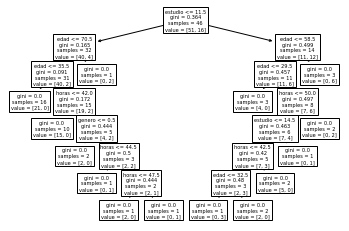

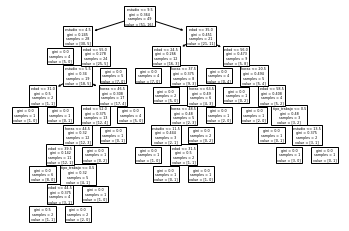

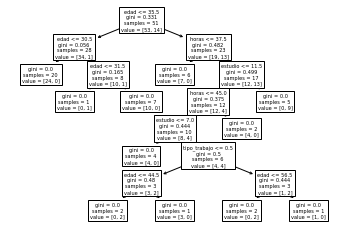

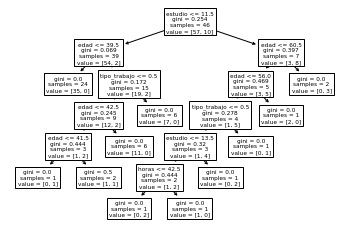

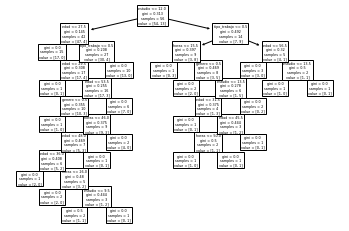

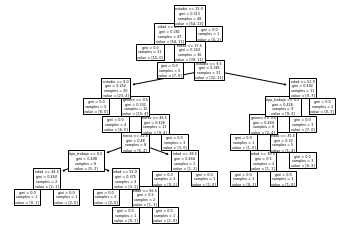

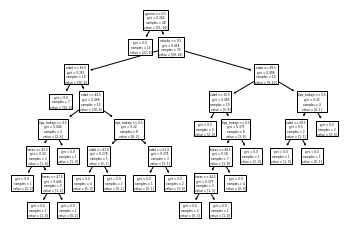

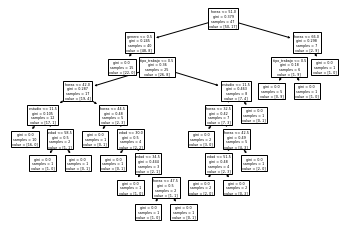

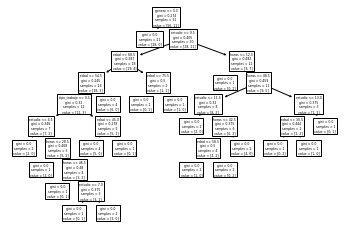

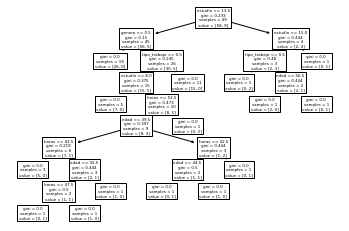

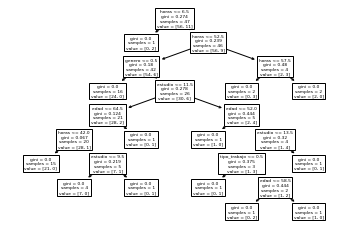

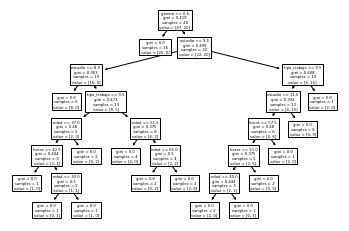

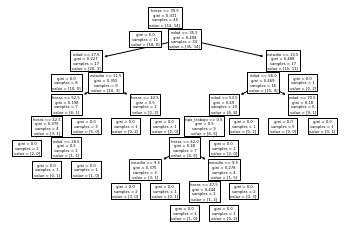

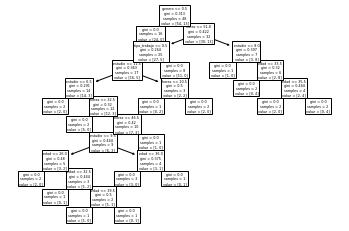

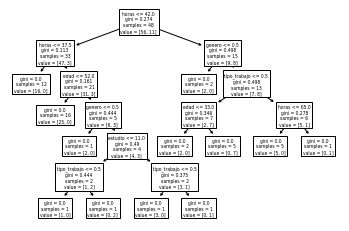

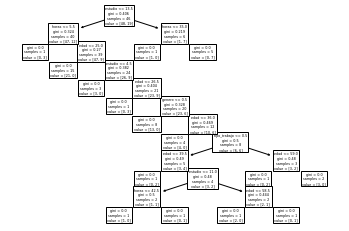

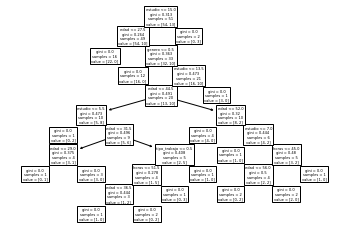

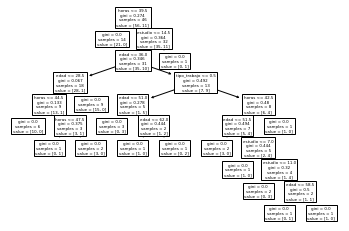

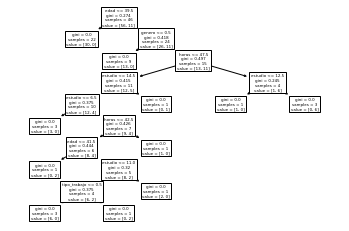

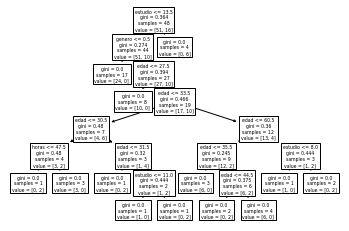

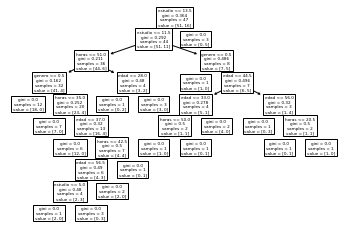

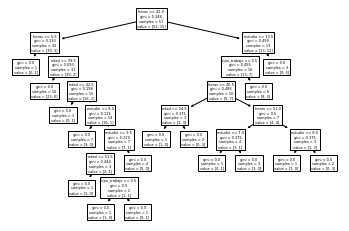

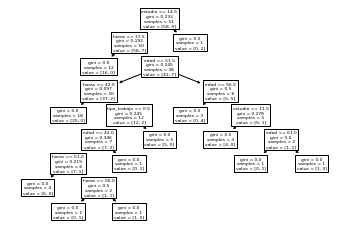

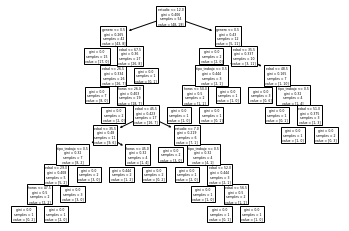

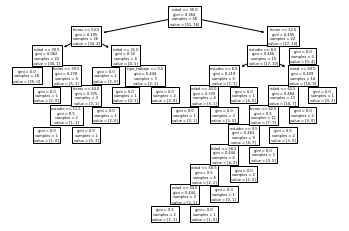

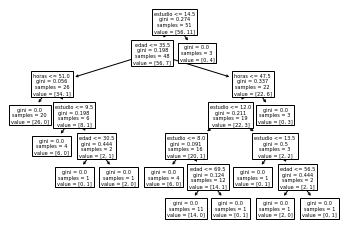

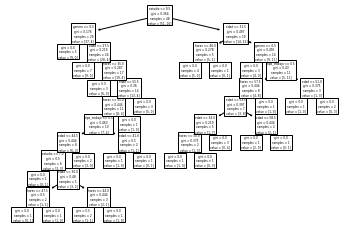

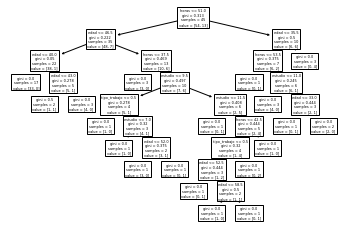

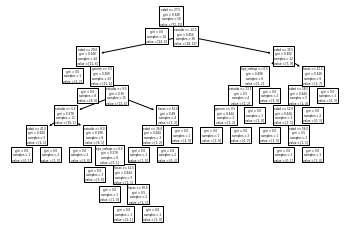

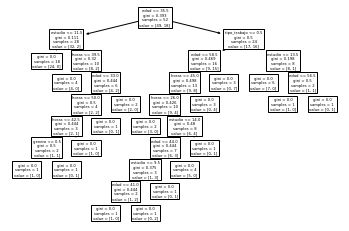

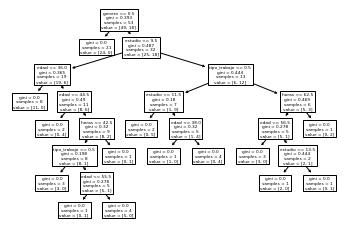

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree

for arbol in bosque.estimators_:
    tree.plot_tree(arbol, feature_names=personas.columns[:-1])
    plt.show()

# cada arbol generado es diferentes, hay mucha variedad de arboles. Luego la decisión dependerá del resultado de cada uno y su análisis en conjunto.